# Imports and setup

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt 
import seaborn as sns
from string import punctuation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Get data

In [2]:
# get the data and see how it looks
data = pd.read_csv('spam_source.csv')
data

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


# Exploratory Data Analysis

In [3]:
# see the available columns
list(data)

['type', 'text']

In [4]:
data.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [5]:
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [6]:
# count type values
data.type.value_counts()

ham     4812
spam     747
Name: type, dtype: int64

In [7]:
# create new column containing length of texts
data['length']=data['text'].apply(len)
data.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


In [8]:
# see the available columns again
list(data)

['type', 'text', 'length']

In [9]:
# count and describe data
data.length.describe()

count    5559.000000
mean       79.781436
std        59.105497
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

# Data Visualization

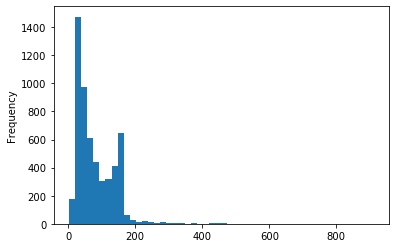

In [10]:
# plot length frequency
data['length'].plot(bins=50,kind='hist')

In [11]:
# combine and separate texts into types
together = "".join(data['text'])
ham_text = " ".join(data.loc[data['type']=="ham",'text'])
spam_text = " ".join(data.loc[data['type']=="spam",'text'])

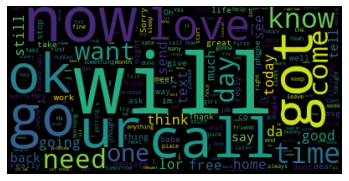

In [12]:
# generate wordcloud overview of all texts
wordcloud = WordCloud().generate(together)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

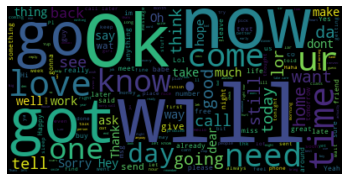

In [13]:
# generate wordcloud overview of ham texts
wordcloud = WordCloud().generate(ham_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

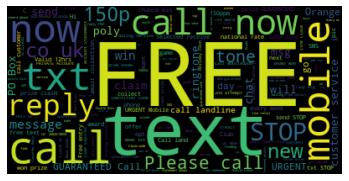

In [14]:
# generate wordcloud overview of spam texts
wordcloud = WordCloud().generate(spam_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text pre-processing

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Andreas Heick
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# define english stopwords AKA useless words
stop = set(stopwords.words('english')+list('punctuation'))
len(stop)

183

In [17]:
lemma = WordNetLemmatizer()
ps = PorterStemmer()

In [18]:
def split_into_lemmas(text):
    text = text.lower()
    # remove special characters, numbers, punctuations
    text =re.sub("[^a-zA-Z ]+", " ", text)
    #Removing Short Words
    #message = message.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    #tokenization, separating words from sentences
    text = word_tokenize(text)
    #stemming : Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
    words = [ps.stem(t) for t in text]
    #[stemmer.stem(plural) for plural in plurals]
    words_sans_stop=[]
    for word in words :
        if word in stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [19]:
Y = data['type']
X = data['text']
X.head()

0    Hope you are having a good week. Just checking in
1                              K..give back my thanks.
2          Am also doing in cbe only. But have to pay.
3    complimentary 4 STAR Ibiza Holiday or £10,000 ...
4    okmail: Dear Dave this is your final notice to...
Name: text, dtype: object

# Vectorization & training

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4447,), (1112,), (4447,), (1112,))

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Andreas Heick
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
tfidf_vectorizer = TfidfVectorizer(analyzer=split_into_lemmas, max_df = 0.9, min_df = 5, max_features = 500, stop_words=stop)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit(x_train)

C:\Users\Andreas Heick Laptop\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


In [24]:
tfidf.get_feature_names()

['abl',
 'abt',
 'account',
 'actual',
 'address',
 'aft',
 'afternoon',
 'age',
 'ah',
 'aight',
 'alreadi',
 'alright',
 'also',
 'alway',
 'ani',
 'anoth',
 'answer',
 'anyth',
 'anyway',
 'appli',
 'ard',
 'around',
 'ask',
 'attempt',
 'await',
 'award',
 'away',
 'awesom',
 'b',
 'babe',
 'babi',
 'back',
 'bad',
 'bank',
 'bath',
 'beauti',
 'becaus',
 'bed',
 'befor',
 'believ',
 'best',
 'better',
 'big',
 'birthday',
 'bit',
 'bonu',
 'book',
 'bore',
 'box',
 'boy',
 'break',
 'bring',
 'brother',
 'bt',
 'bu',
 'busi',
 'buy',
 'c',
 'call',
 'came',
 'camera',
 'cant',
 'car',
 'care',
 'cash',
 'caus',
 'chanc',
 'chang',
 'charg',
 'chat',
 'check',
 'choos',
 'claim',
 'class',
 'close',
 'club',
 'co',
 'code',
 'collect',
 'colour',
 'com',
 'come',
 'complet',
 'contact',
 'content',
 'cool',
 'cost',
 'could',
 'coz',
 'credit',
 'custom',
 'da',
 'dad',
 'dat',
 'date',
 'day',
 'de',
 'dear',
 'decid',
 'decim',
 'deliveri',
 'den',
 'detail',
 'di',
 'didnt',
 'd

In [25]:
train1 = tfidf.transform(x_train)
test1 = tfidf.transform(x_test)
train1.shape, test1.shape

((4447, 500), (1112, 500))

In [26]:
clf= MultinomialNB()
clf.fit(train1, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Final prediction

In [27]:
predictions=pd.DataFrame(list(zip(y_test,clf.predict(test1))),columns=['real','predicted'])

pd.crosstab(predictions['real'],predictions['predicted'])

predicted,ham,spam
real,,
ham,951,5
spam,30,126


In [28]:
pred =clf.predict(test1)
pred

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [29]:
accuracy_score(y_test,pred )

0.9685251798561151

### Pretty accurate! Only 5 hams were detected as spam, and only 30 spams got through